<a href="https://colab.research.google.com/github/Mumo-vicky/House-Prices-Prediction/blob/master/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

### **Problem definition**

I work for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

I am suppossed to evaluate different regression models in order to find the most accurate for prediction of house prices based on the variables provided.

## **Metrics For Success**


The following are the goals for the project to be deemed successful.:

Discuss the factors that contribute the most and the least to the pricing of a house from the data given.
Obtain an appropriate metic for evaluating all the five models and interpret the findings obtained on the metrics.
Draw conclusions and recommendations from the models

## **Data Understanding**

Our data Contains the following columns.
* Id
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15

## **Experimental design**

The following are the tasks that I am going to perform:
* Load the datasets
* Data preparation
* Perform Exploratory analysis
* Check  for multicollinearity
* Fit regression models to the data
* Evaluate the models
* Conclusion
* Recommendations

# **Data Preparation**

**Loading Appropriate Libraries.**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import scipy as sp
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

**Loading the Data**

In [3]:
#loading the data from the url provided.
data = pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")

## **Previewing Data**

In [4]:
#previewing the bottom
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#previwing the bottom
data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
#viewing the rows and columns.
data.shape

(21613, 20)

In [7]:
#checking for null, missing and duplicated values.
print("Null Values")
print(data.isnull().sum())
print("Missing Values")
print(data.isna().sum())
print("Duplicated Values:",data.duplicated().sum())

Null Values
id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Missing Values
id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Duplicated Values: 3


In [8]:
#dropping the duplicated values noted.
data = data.drop_duplicates()
data.duplicated().sum()

0

In [9]:
data.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [10]:
#previewing numerical aspects of our data.
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
#checking for the data types for our columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21610 non-null  int64  
 1   price          21610 non-null  float64
 2   bedrooms       21610 non-null  int64  
 3   bathrooms      21610 non-null  float64
 4   sqft_living    21610 non-null  int64  
 5   sqft_lot       21610 non-null  int64  
 6   floors         21610 non-null  float64
 7   waterfront     21610 non-null  int64  
 8   view           21610 non-null  int64  
 9   condition      21610 non-null  int64  
 10  grade          21610 non-null  int64  
 11  sqft_above     21610 non-null  int64  
 12  sqft_basement  21610 non-null  int64  
 13  yr_built       21610 non-null  int64  
 14  yr_renovated   21610 non-null  int64  
 15  zipcode        21610 non-null  int64  
 16  lat            21610 non-null  float64
 17  long           21610 non-null  float64
 18  sqft_l

## **Cleaning and Tidying of the Data.**

In [12]:
#dropping the id column since we do not need it.
#defining the columns for later use in plotting.
data = data.drop(columns='id')
columns = data.columns
columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

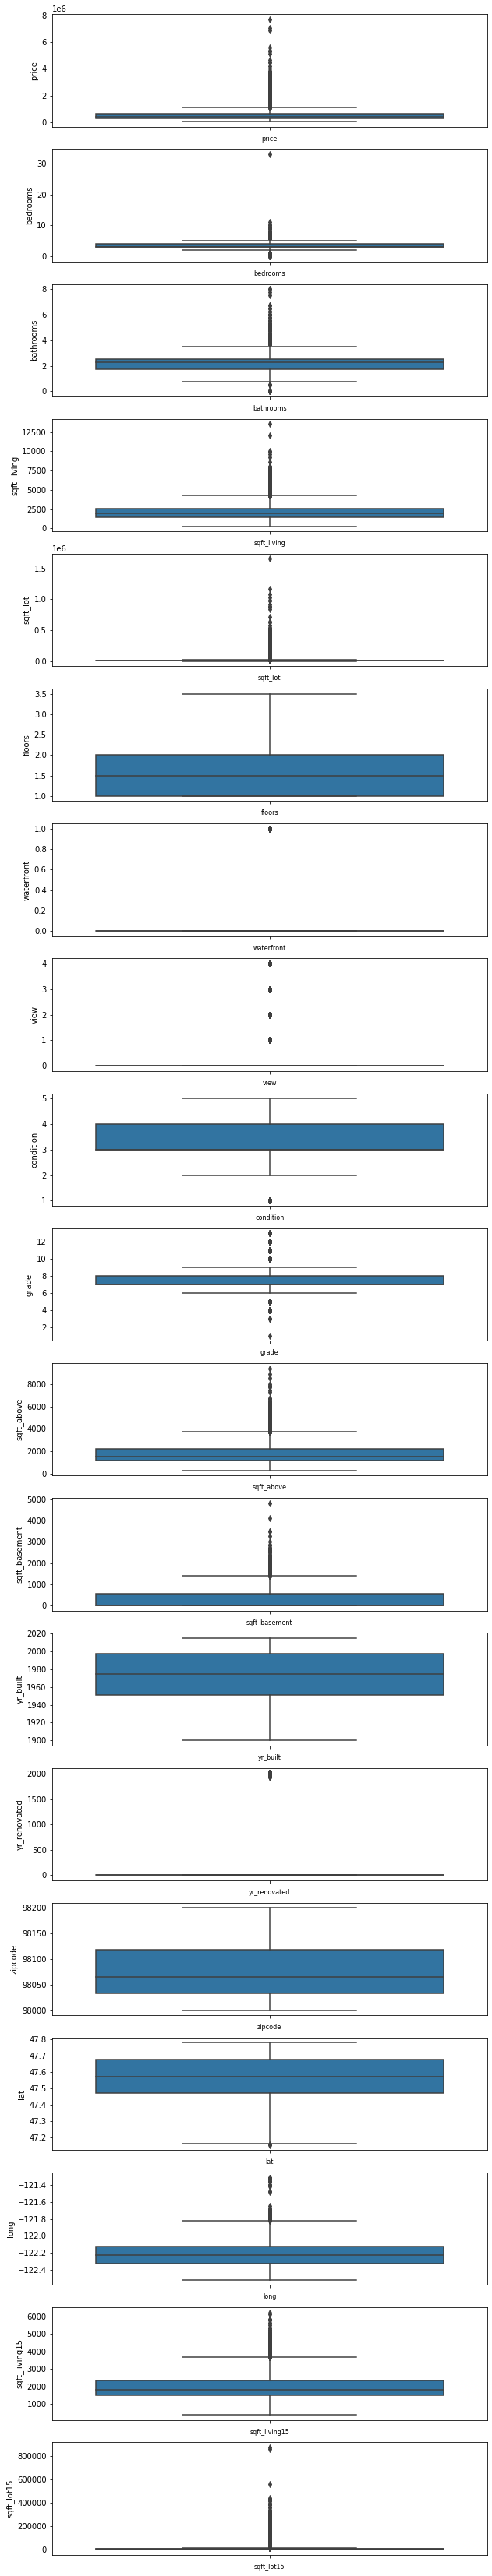

In [13]:
#plotting outliers in the data.
fig, ax = plt.subplots(len(columns), figsize = (10, 60))

for i, col_val in enumerate(columns):

  sns.boxplot(y= data[col_val], ax=ax[i])
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Our data looks fairly clean, not having as many outliers. The only visible outliers that we can see is that in the bedrooms column and the year renovated column. I will check the bedrooms outlier but the year renovated column may be an actuality since houses may not have been renovated for a couple of years.

In [14]:
data.loc[data['bedrooms'] > 30]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


I am going to check the houses that have a price above 640000 to see whether there is any instance of such a high number of bedrooms.

In [15]:
data.loc[data['price'] > 600000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,650000.0,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2000000.0,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21597,1580000.0,4,3.25,3410,10125,2.0,0,0,3,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125
21599,810000.0,4,3.00,3990,7838,2.0,0,0,3,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814
21600,1540000.0,5,3.75,4470,8088,2.0,0,0,3,11,4470,0,2008,0,98004,47.6321,-122.200,2780,8964
21605,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023


The value is an outlier since the other houses have houses within 3 to 5. I will thus remove the input as it is an outlier.

In [18]:
#dropping the bedroom outlier.
data = data[data.bedrooms < 30]

## **Data Exploration**

### **Univariate Analysis.**

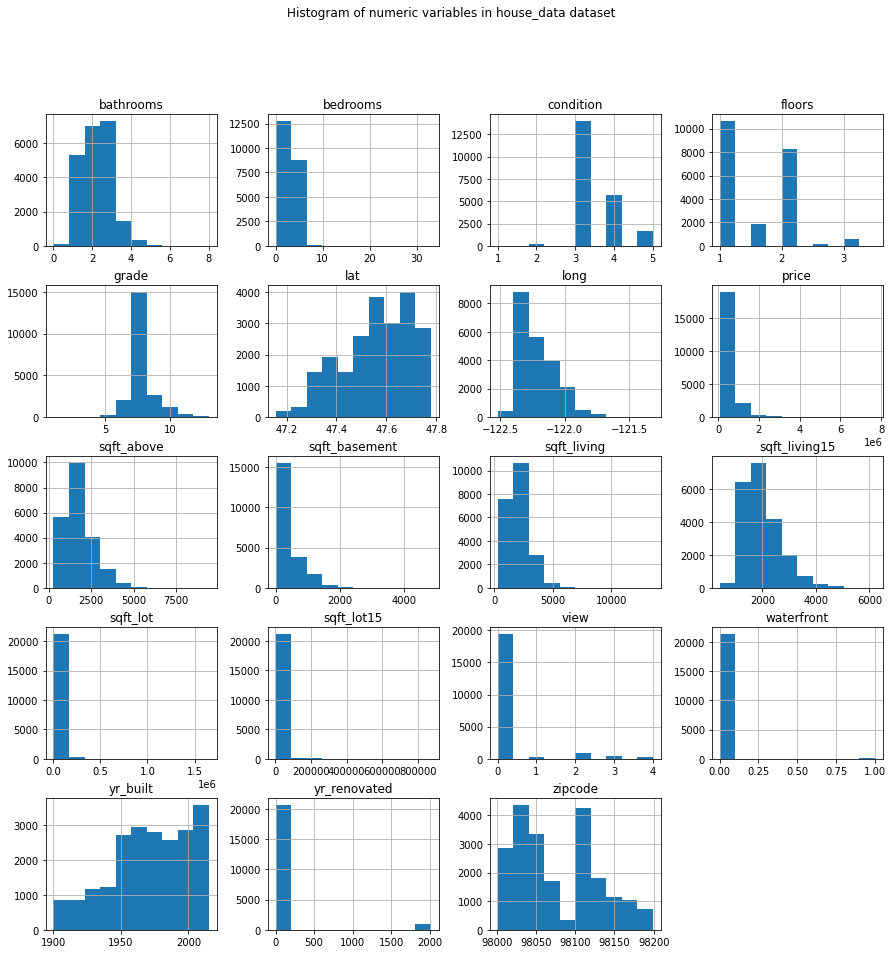

In [16]:
#plotting the histograms for the variables.
data.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables in house_data dataset")
plt.show()

### **Bivariate Analysis**

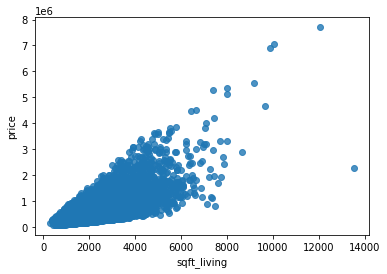

In [17]:
sns.regplot(y=data["price"], x=data["sqft_living"], fit_reg=False)

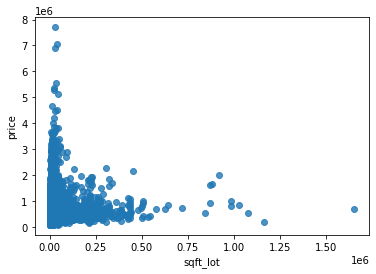

In [18]:
sns.regplot(y=data["price"], x=data["sqft_lot"], fit_reg=False)

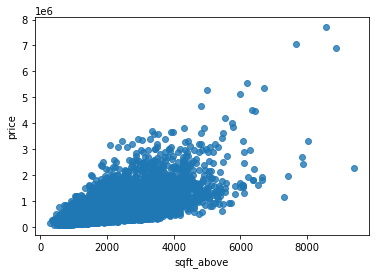

In [19]:
sns.regplot(y=data["price"], x=data["sqft_above"], fit_reg=False)

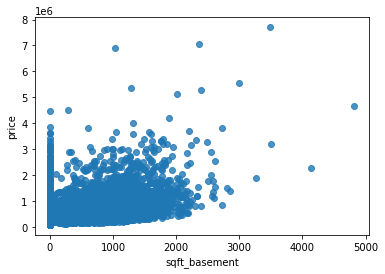

In [20]:
sns.regplot(y=data["price"], x=data["sqft_basement"], fit_reg=False)

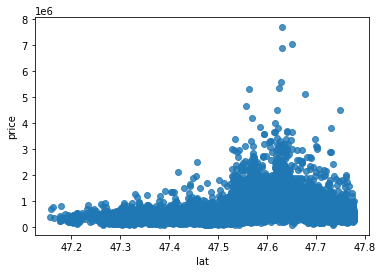

In [21]:
sns.regplot(y=data["price"], x=data["lat"], fit_reg=False)

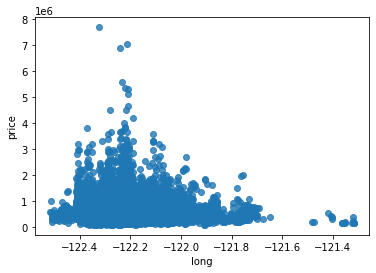

In [22]:
sns.regplot(y=data["price"], x=data["long"], fit_reg=False)

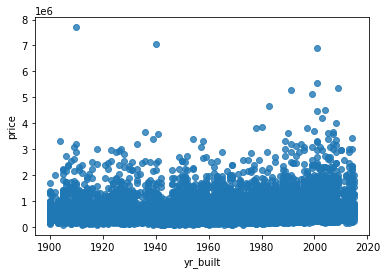

In [23]:
sns.regplot(y=data["price"], x=data["yr_built"], fit_reg=False)

From our bivariate analysis, we can infer that the relations between the different variables and the price of the houses differs. The building of the houses is spread out over the years and they don't seem to factor a lot in the price of the house.

### **Multivariate Analysis.**

In [24]:
#finding the correlations between the columns.
correlation = data.corr()
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424
grade,0.667478,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.114086,0.198347,0.713208,0.119265


We can see that there is higher correlation between price and the following:

* Bathrooms
* Living room area
* Grade
* Squarefeet above
* Sqft_living15

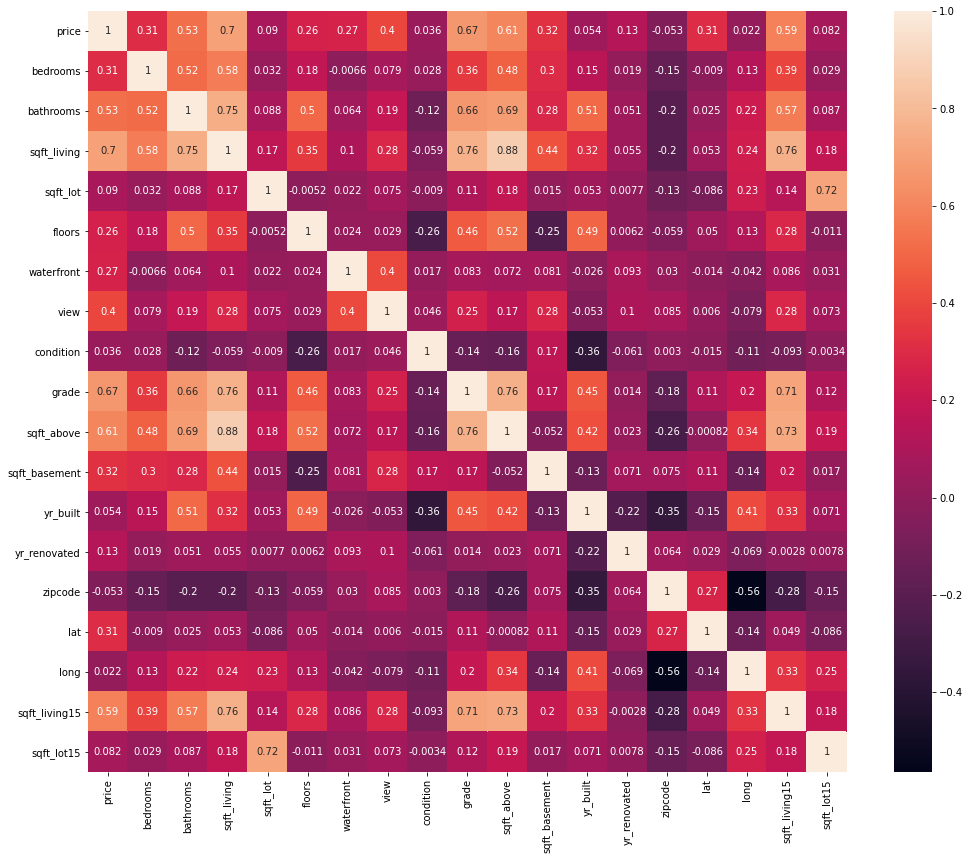

In [25]:
#viewing the correlations heatmap
plt.figure(figsize=(17, 14))
sns.heatmap(correlation, annot = True)

### **Multicollinearity**

We create a new data frame where we only have our independent variables so that we can check for multicolliearity within them using the variance inflation factor.

In [26]:
#creating the dataframe
independent = data.drop(columns='price')

In [27]:
#viewing their correlation
ind_corr = independent.corr()
ind_corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424
grade,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.114086,0.198347,0.713208,0.119265
sqft_above,0.477619,0.685351,0.876600,0.183527,0.523874,0.072080,0.167659,-0.158212,0.755919,1.000000,-0.051923,0.423922,0.023233,-0.261163,-0.000823,0.343791,0.731870,0.194060


In [28]:
#plotting the VIF scores.
VIF=pd.DataFrame(np.linalg.inv(ind_corr.values), index = ind_corr.index, columns=ind_corr.columns)
VIF

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.652159,-0.461426,-6.131806e-01,0.049327,0.049848,0.063078,0.114430,-0.050633,0.306941,-3.237657e-01,-1.881523e-01,0.134509,0.045800,0.080174,0.050839,0.017554,0.025284,0.085416
bathrooms,-0.461426,3.351248,-3.146032e+00,-0.024033,-0.675409,0.010097,-0.042387,-0.137265,-0.267927,1.566362e+00,4.385015e-01,-0.935745,-0.260436,0.041789,-0.041080,0.053741,0.092020,0.071444
sqft_living,-0.614125,-3.147527,1.814600e+13,-0.083836,2.725995,-0.075267,-0.010738,-0.174659,-1.942256,-1.636081e+13,-8.743992e+12,0.465511,0.157235,-0.351953,-0.055686,0.225522,-1.068731,-0.050464
sqft_lot,0.049327,-0.024033,-8.472318e-02,2.102526,0.045181,0.027369,-0.059109,0.030522,-0.053865,-1.229640e-01,-1.799981e-03,0.098734,0.021295,-0.002580,0.053339,-0.133206,0.163933,-1.459308
floors,0.049848,-0.675409,2.727895e+00,0.045181,2.011974,-0.005524,-0.040067,0.089832,-0.230827,-2.964235e+00,-6.995572e-01,-0.481324,-0.079986,-0.170816,-0.127521,0.164281,0.272632,0.072657
waterfront,0.063078,0.010097,-7.563028e-02,0.027369,-0.005524,1.203970,-0.492855,-0.012820,0.049272,-4.380875e-02,3.280588e-02,-0.021102,-0.065851,0.022562,0.009815,0.027241,0.054397,-0.018480
view,0.114430,-0.042387,-9.767467e-03,-0.059109,-0.040067,-0.492855,1.435320,-0.021126,-0.185270,4.816459e-02,-2.516918e-01,0.151685,-0.039119,-0.140639,0.118633,0.071934,-0.325388,-0.007469
condition,-0.050633,-0.137265,-1.749044e-01,0.030522,0.089832,-0.012820,-0.021126,1.249500,-0.054508,2.132228e-01,-1.323553e-02,0.561510,0.206913,0.161279,0.063727,-0.006876,0.075908,-0.028242
grade,0.306941,-0.267927,-1.945115e+00,-0.053865,-0.230827,0.049272,-0.185270,-0.054508,3.416981,1.441457e-01,4.510090e-01,-0.638907,-0.071472,0.083155,-0.330860,0.393716,-0.911600,0.071863
sqft_above,-0.321458,1.564793,-1.636081e+13,-0.123737,-2.962207,-0.044143,0.049025,0.212984,0.141509,1.475124e+13,7.883763e+12,0.100178,-0.142897,0.241689,0.231229,-0.545073,-0.572072,-0.130215


We are able to see that sqft_living, sqft_above and sqft_basement have very high values(higher than 5) and we are going to remove them inorder to see if there will be any change.

In [29]:
#dropping the columns.
#creating a new data frame without the columns.
vif_most = ['sqft_living', 'sqft_above', 'sqft_basement']
independent_new = independent.drop(columns = vif_most, axis = 1)

In [31]:
#a new vifs for the independent variables.
new_corr = independent_new.corr()
pd.DataFrame(np.linalg.inv(new_corr.values), index = new_corr.index, columns = new_corr.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.459639,-0.797621,0.015625,0.072855,0.047175,0.081416,-0.057630,0.013440,0.242510,0.043538,0.057631,0.063493,-0.007161,-0.255790,0.052407
bathrooms,-0.797621,2.695228,-0.070430,-0.470760,-0.006948,-0.151196,-0.173065,-0.706067,-0.754958,-0.266856,-0.004826,-0.052337,0.072536,-0.329150,0.020730
sqft_lot,0.015625,-0.070430,2.094376,0.019485,0.022647,-0.055643,0.033559,-0.118689,0.119053,0.021345,-0.005216,0.061582,-0.148729,0.102139,-1.466339
floors,0.072855,-0.470760,0.019485,1.616759,-0.029218,0.085952,0.146938,-0.373277,-0.475583,-0.073820,-0.150826,-0.049442,0.019401,0.139986,0.060065
waterfront,0.047175,-0.006948,0.022647,-0.029218,1.200987,-0.487621,-0.009729,0.013451,-0.010965,-0.065653,0.021828,0.016050,0.015559,0.020338,-0.022285
view,0.081416,-0.151196,-0.055643,0.085952,-0.487621,1.391689,-0.039828,-0.180383,0.164405,-0.041340,-0.149884,0.096047,0.113678,-0.321881,-0.007985
condition,-0.057630,-0.173065,0.033559,0.146938,-0.009729,-0.039828,1.241178,-0.039722,0.562762,0.205986,0.157980,0.052775,0.013422,0.089528,-0.027071
grade,0.013440,-0.706067,-0.118689,-0.373277,0.013451,-0.180383,-0.039722,2.889233,-0.465822,-0.072253,0.056611,-0.275567,0.289168,-1.415296,0.014060
yr_built,0.242510,-0.754958,0.119053,-0.475583,-0.010965,0.164405,0.562762,-0.465822,2.368748,0.534713,0.268625,0.299542,-0.484607,0.243273,-0.014442
yr_renovated,0.043538,-0.266856,0.021345,-0.073820,-0.065653,-0.041340,0.205986,-0.072253,0.534713,1.150383,0.036282,0.045099,-0.052172,0.098462,-0.022335


Bathrooms, grade and floors are the variables that have shown a significant chage and this shows that they were highly correlated to the dropped columns. However, while bathrooms and grade decrease, floors increases.

# **Regressions.**

## **Linear regression**

I am going to perform linear regression first for my data inorder to have a baseline model for comparison and also see its perfomance.

In [32]:
#specification of the independent and dependent variables.
independent = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
dependent = ['price']

In [71]:
#Splitting the independent and dependent variables.
#spliting using train_test_split to training and test dataframes.
#fitting of the linear regression
x1 = data[independent]
y1 = data[dependent]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#predicting the y using the linear regression and calculating the mean squared error.
y1a_pred = lin_reg.predict(x1_test)
lin_mod = (mean_squared_error(y1_test, y1a_pred)) 
print("Mean Squared Error for the linear model is:",lin_mod)

Mean Squared Error for the linear model is: 38256390781.782135


In [35]:
#reviewing the intercept and the coefficients.
print(lin_reg.intercept_)
print(lin_reg.coef_)

[5421048.19528984]
[[-3.64902421e+04  3.88923494e+04  1.10902730e+02  1.55767776e-01
   6.04117988e+03  6.40593526e+05  5.30402689e+04  2.71859259e+04
   9.52167466e+04  6.98553674e+01  4.10473630e+01 -2.56322018e+03
   2.02332123e+01 -5.74793218e+02  6.01963167e+05 -2.18412246e+05
   2.46714516e+01 -4.03347575e-01]]


In [36]:
#predicting using the linear prediction and getting the base mean squared error for use in comparison
y1_pred = lin_reg.fit(x1,y1).predict(x1)
lin_mod_mse = (mean_squared_error(y1, y1_pred)) 
print("Mean Squared Error for the linear model is:",lin_mod_mse)

Mean Squared Error for the linear model is: 40516476382.74072


This is the baseline mean squared error that we are going to use for comparrison

**Regularization**

I use the Variance Inflation factor in order for me to regularize the model to see if I will get better results.
I had already calculated the variance inflation factor and thus I know the columns that I have specified for use.

In [37]:
#creating a new dataframe excluding the columns specified according to the VIF
data_vif = data.drop(columns=vif_most)

In [38]:
#specifying the independent columns.
independent_a = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [39]:
#splitting the data into the independent and dependent variables.
#splitting using train_test_split into training and testing dataframes.
#fitting the linear regression.
xa = data_vif[independent_a].values
ya = data_vif[dependent].values.reshape(-1,1)

xa_train, xa_test, ya_train, ya_test = train_test_split(xa, ya, test_size=0.2,random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(xa_train, ya_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
#predicting the y variables using the linear regression
#calculating the mean squared error.
ya_pred = lin_reg.predict(xa_test)
lin_mod_a_mse = (mean_squared_error(ya_test, ya_pred))
print("Mean Squared Error for the linear model with the VIF analysed is:",lin_mod_a_mse)

Mean Squared Error for the linear model with the VIF analysed is: 42923342713.656395


The mean squared error for the regularized linear model is higher than the initial linear model and thus the initial/base linear model is better.

In [41]:
#displaying the itercept and the coefficients.
print(lin_reg.intercept_)
print(lin_reg.coef_)

[6559080.11968609]
[[-4.20321930e+03  1.04851406e+05  2.93919850e-01  1.14008321e+04
   6.85221980e+05  5.70537465e+04  2.67649983e+04  1.37600365e+05
  -3.14585081e+03  2.15896945e+01 -5.08998757e+02  5.78115194e+05
  -1.72065198e+05  9.40892972e+01 -1.75347281e-01]]


In [42]:
#finding residuals.
residuals = np.subtract(ya_pred, ya_test)
print(residuals.mean())

-1473.9489623111924


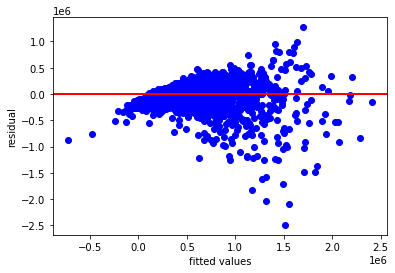

In [43]:
#plotting the residuals against the predicted values to see the shape of the plot for visualization of heteroscedasticity
plt.scatter(ya_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=2)
plt.show()

The plot has formed a cone shape form and we can thus say that the data is heteroscedasticity.

In [45]:
#performing bartlett's test
test_result, p_value = sp.stats.bartlett(y1_pred.flatten(), residuals.flatten())

degree_of_freedom = len(y1_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## **Quantile Regression**

I have performed the quantile regression with the dataframe that had vif regularization performed on it as errors arose with the initial dataset.

In [46]:
#splitting the dataset into dependent and independent variables.
x2 = data[independent_a]
y2 = data[dependent]

In [47]:
#fitting the quantile regression.
quant_mod = smf.quantreg('y2 ~ x2', data)
res = quant_mod.fit(q = 0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                     y2   Pseudo R-squared:               0.4539
Model:                       QuantReg   Bandwidth:                   2.039e+04
Method:                 Least Squares   Sparsity:                    2.793e+05
Date:                Fri, 25 Sep 2020   No. Observations:                21610
Time:                        16:58:03   Df Residuals:                    21594
                                        Df Model:                           15
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -211.3619      3.616    -58.457      0.000    -218.449    -204.275
x2[0]        547.7293   1231.713      0.445      0.657   -1866.519    2961.978
x2[1]       5.944e+04   2023.072     29.383      0.000    5.55e+04    6.34e+04
x2[2]          0.3203      0.033      9.663      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [49]:
#creating a fuction for perfomance of the different models and looping through the models with a for loop while storing the parameters to a created dataframe.
quantiles = np.arange(0.1, 1, 0.1)
def fit_model(q):
    res = quant_mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['x2[0]']] + res.conf_int().loc['x2[0]'].tolist()

models = [fit_model(x) for x in quantiles]
params = pd.DataFrame(data = models, columns=['qt', 'intercept', 'x2_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/

    qt   intercept      x2_coef  cf_lower_bound  cf_upper_bound
0  0.1 -136.803562 -7583.957908    -9579.456680    -5588.459136
1  0.2 -308.550746  4813.476689     2647.699587     6979.253790
2  0.3 -342.568341  1578.788032     -685.699181     3843.275246
3  0.4 -380.432822 -2538.340365    -4783.507789     -293.172941
4  0.5 -211.361897   547.729338    -1866.519018     2961.977695
5  0.6   15.502707  1334.367965    -1246.909801     3915.645731
6  0.7  152.246568  1656.260286    -1332.362615     4644.883188
7  0.8  -10.101252  1954.145092    -1429.546727     5337.836911
8  0.9   37.790536 -5704.984046   -12320.712552      910.744460


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [50]:
#calculating for the mean squared error.
y2_pred = quant_mod.fit(q=.5).predict(x2)
quant_reg_mse = (mean_squared_error(y2, y2_pred))
print("The mean squared error for the quantile regression is:",quant_reg_mse)

The mean squared error for the quantile regression is: 50541238201.352974


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


The mean squared error for the quantile regression is still huge and this shows that it is also not accurate for prediction

## **Ridge Regression**

In [51]:
#splitting the independent and dependent variables
x3 = data[independent]
y3 = data[dependent]

In [53]:
#creating the grid.
rid_reg = Ridge(normalize=True)
search = GridSearchCV(estimator=rid_reg,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [54]:
search.fit(x3,y3)
print(search.best_params_)
abs(search.best_score_) 

{'alpha': 0.01}


41014661978.931015

In [55]:
rid_reg = Ridge(normalize=True,alpha=0.01)
rid_reg.fit(x3,y3)
y3_pred = rid_reg.predict(x3)
rid_mod = (mean_squared_error(y3,y3_pred))
print("The mean squared error for the ridge regression model is:",rid_mod)

The mean squared error for the ridge regression model is: 40522796287.94708


In [56]:
coef_dict_baseline = {}
for coef, feat in zip(rid_reg.coef_,x3.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': array([-3.45413758e+04,  4.08069672e+04,  8.81850265e+01,  1.26913327e-01,
         7.38353743e+03,  5.78347851e+05,  5.30631128e+04,  2.68303513e+04,
         9.42163680e+04,  9.10170354e+01,  6.11354140e+01, -2.55805769e+03,
         2.11226308e+01, -5.61155956e+02,  5.98348262e+05, -2.12984001e+05,
         2.44915132e+01, -3.71504797e-01])}

In [57]:
coef_dict_baseline = {}
for coef, feat in zip(lin_reg.coef_,x3.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': array([-4.20321930e+03,  1.04851406e+05,  2.93919850e-01,  1.14008321e+04,
         6.85221980e+05,  5.70537465e+04,  2.67649983e+04,  1.37600365e+05,
        -3.14585081e+03,  2.15896945e+01, -5.08998757e+02,  5.78115194e+05,
        -1.72065198e+05,  9.40892972e+01, -1.75347281e-01])}

## **Lasso Regression**

In [72]:
#splittig the independent and dependent variables.
x4 = data[independent]
y4 = data[dependent]

In [73]:
#scaling the data.
scaler = StandardScaler()
scaler.fit(x4)
x4 = scaler.transform(x4)

In [74]:
#fitting the base model
las_reg = linear_model.Lasso() 
las_reg.fit(x4, y4) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", las_reg.score(x4, y4)) 
print("lasso MSE:", mean_squared_error(y4, las_reg.predict(x4))) 
print("lasso coef:", las_reg.coef_) 

lasso score: 0.6998054426678352
lasso MSE: 40516476424.81792
lasso coef: [-33266.88233668  31637.6631829  259485.35635095   5304.44525436
   3657.82919038  50406.18341507  40634.06469055  17213.01805439
 112832.08022218 -83795.31887747 -58563.3849552  -77017.13543297
   8043.51869173 -31173.4407627   83544.44491153 -30240.53390784
  14862.22210763 -10437.22505233]


In [75]:
# Building the Lasso regression and choosing the regularization parameter with the help of GridSearch.
import warnings
warnings.filterwarnings("ignore")
#splitting the data and fitting the model.
#displaying various measures for the data(score, parameters, mse and the best estimator coefficients.)
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=100)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

grid_las_reg = GridSearchCV(las_reg, parameters, scoring ='r2') 

grid_las_reg.fit(x4_train, y4_train)
print("lasso best parameters:", grid_las_reg.best_params_) 
print("lasso score:", grid_las_reg.score(x4_test, y4_test))
print("lasso MSE:", mean_squared_error(y4_test, grid_las_reg.predict(x4_test)))
print("lasso best estimator coef:", grid_las_reg.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.6967838627443836
lasso MSE: 42680542041.233864
lasso best estimator coef: [-32952.78642375  34541.39361797 257867.01754784   5541.22142369
   2614.51766984  50582.96814982  39612.15093075  17960.70918606
 114840.37341239 -86753.79259728 -60516.93197584 -76592.80230853
   6729.11888795 -30248.84917102  83538.28563355 -29777.0282763
  15711.10876602 -11167.42697652]


In [63]:
#fitting the model using the recommended parameters.
#calculating the score.
las_reg = linear_model.Lasso(alpha=0.1) 
las_reg.fit(x4, y4) 
print("The Lasso regression score is:", las_reg.score(x4, y4)) 


The Lasso regression score is: 0.6998054429764762


In [64]:
#predicting using the model and calculating the mean squared error
y4_pred = las_reg.predict(x4)
las_reg_mse = mean_squared_error(y4, y4_pred)
print("The mean squared error for the Lasso Regression is :", las_reg_mse)

The mean squared error for the Lasso Regression is : 40516476383.16145


In [65]:
#calculating the coefficients. 
print("The best estimator coefficient:", grid_las_reg.best_estimator_.coef_)

The best estimator coefficient: [-32952.78642375  34541.39361797 257867.01754784   5541.22142369
   2614.51766984  50582.96814982  39612.15093075  17960.70918606
 114840.37341239 -86753.79259728 -60516.93197584 -76592.80230853
   6729.11888795 -30248.84917102  83538.28563355 -29777.0282763
  15711.10876602 -11167.42697652]


The Lasso regression does not reduce any coefficients to zero and this shows that it has failed as it cannot predict the most influential factors within the variables.

The mean squared error too is just a bit higher and thus it is not better compared to the linear model.

## **Elastic Net regression**

In [66]:
#splitting our independent and dependent variables
x5 = data[independent]
y5 = data[dependent]

In [67]:
#normalizing our data and creating a grid.
ela_reg=ElasticNet(normalize=True)
search=GridSearchCV(estimator=ela_reg,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [68]:
#fitting our data and displaying the appropriate parameters.
search.fit(x5,y5)
abs(search.best_score_)
print(search.best_params_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


In [69]:
#substituting our parameters into the models and fitting it.
#finding the mean squared error for the model
ela_reg=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
ela_reg.fit(x5,y5)
y5_pred = ela_reg.predict(x5)
ela_reg_mse=(mean_squared_error(y5,y5_pred))
print("The mean squared error for the elastic net regression is:",ela_reg_mse)

The mean squared error for the elastic net regression is: 40617078111.499664


In [70]:
#displaying the coefficients for the model.
coef_dict_baseline = {}
for coef, feat in zip(ela_reg.coef_,x5.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 40080.93905141283,
 'bedrooms': -30825.401738192882,
 'condition': 27751.115250911454,
 'floors': 9092.5181624262,
 'grade': 89138.1336916659,
 'lat': 583393.3082283601,
 'long': -206611.44456200232,
 'sqft_above': 87.49742045635497,
 'sqft_basement': 61.32638937630348,
 'sqft_living': 85.36822139636668,
 'sqft_living15': 32.10722625702676,
 'sqft_lot': 0.12227747523517753,
 'sqft_lot15': -0.33788053280932984,
 'view': 53120.654857529626,
 'waterfront': 564761.7304552095,
 'yr_built': -2370.5847644569476,
 'yr_renovated': 24.123226091164373,
 'zipcode': -497.23591138766966}

From our coefficients, we can see that latitude, longitude and waterfront highly affect the house price and this infers that the the three are huge determinants for the price of the house.

# **Conclusion and Recommendation**

In [87]:
print("The mean Squared Error for the linear model is:",lin_mod_mse)
print("The mean squared error for the quantile regression is:",quant_reg_mse)
print("The mean squared error for the ridge regression model is:",rid_mod)
print("The mean squared error for the Lasso Regression is :", las_reg_mse)
print("The mean squared error for the elastic net regression is:",ela_reg_mse)

The mean Squared Error for the linear model is: 40516476382.74072
The mean squared error for the quantile regression is: 50541238201.352974
The mean squared error for the ridge regression model is: 40522796287.94708
The mean squared error for the Lasso Regression is : 40516476383.16145
The mean squared error for the elastic net regression is: 40617078111.499664


* We Can see that the linear model potrays the lowest mean squared error and this shows that it has the highest accuracy compared to the other models.
* From the elastic net model, we can derive that longitude, latitude and waterfront highly influence the price of the house.

Since our Linear Model is our most successful one, we can perform cross validation in order to see how further we can better it.

### **Cross Validation**

I have decided to use the leave one out cross validation. It will be time consuming but the results will be better.

In [85]:
from sklearn.model_selection import LeaveOneOut

# We will use the same independent variables for this
X = data[independent].values
Y= data[dependent].values

folds = LeaveOneOut()

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

MSES = [] # We will use this array to keep track of the RSME of each model
count = 0 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]
  
  # fitting the linear model
  lin_reg.fit(X_train, Y_train)
  
  # assess the accuraccy of the model
  Y_pred = lin_reg.predict(X_test)
  
  mse_value =  (metrics.mean_squared_error(Y_test, Y_pred))
  MSES.append(mse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(MSES)

we are using 21610 folds
trained 21610 models


40741781151.852646

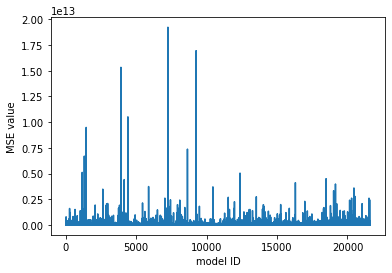

In [86]:
plt.plot(MSES)
plt.ylabel('MSE value')
plt.xlabel('model ID')
plt.show()

We can see that after cross validation, the value of the mean squared error has improved significantly. This shows how far the model can be improved in order to achieve higher accuracy with our current dataset.

We can conclude that the linear model is the best model in our case, after perfoming our cross validation.

The factors that contribute most to the price of the house are the longitude, the latitude, and the presence of a waterfront. This shows that the location of a house is highly important when it comes to determination of the price of the house.